# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


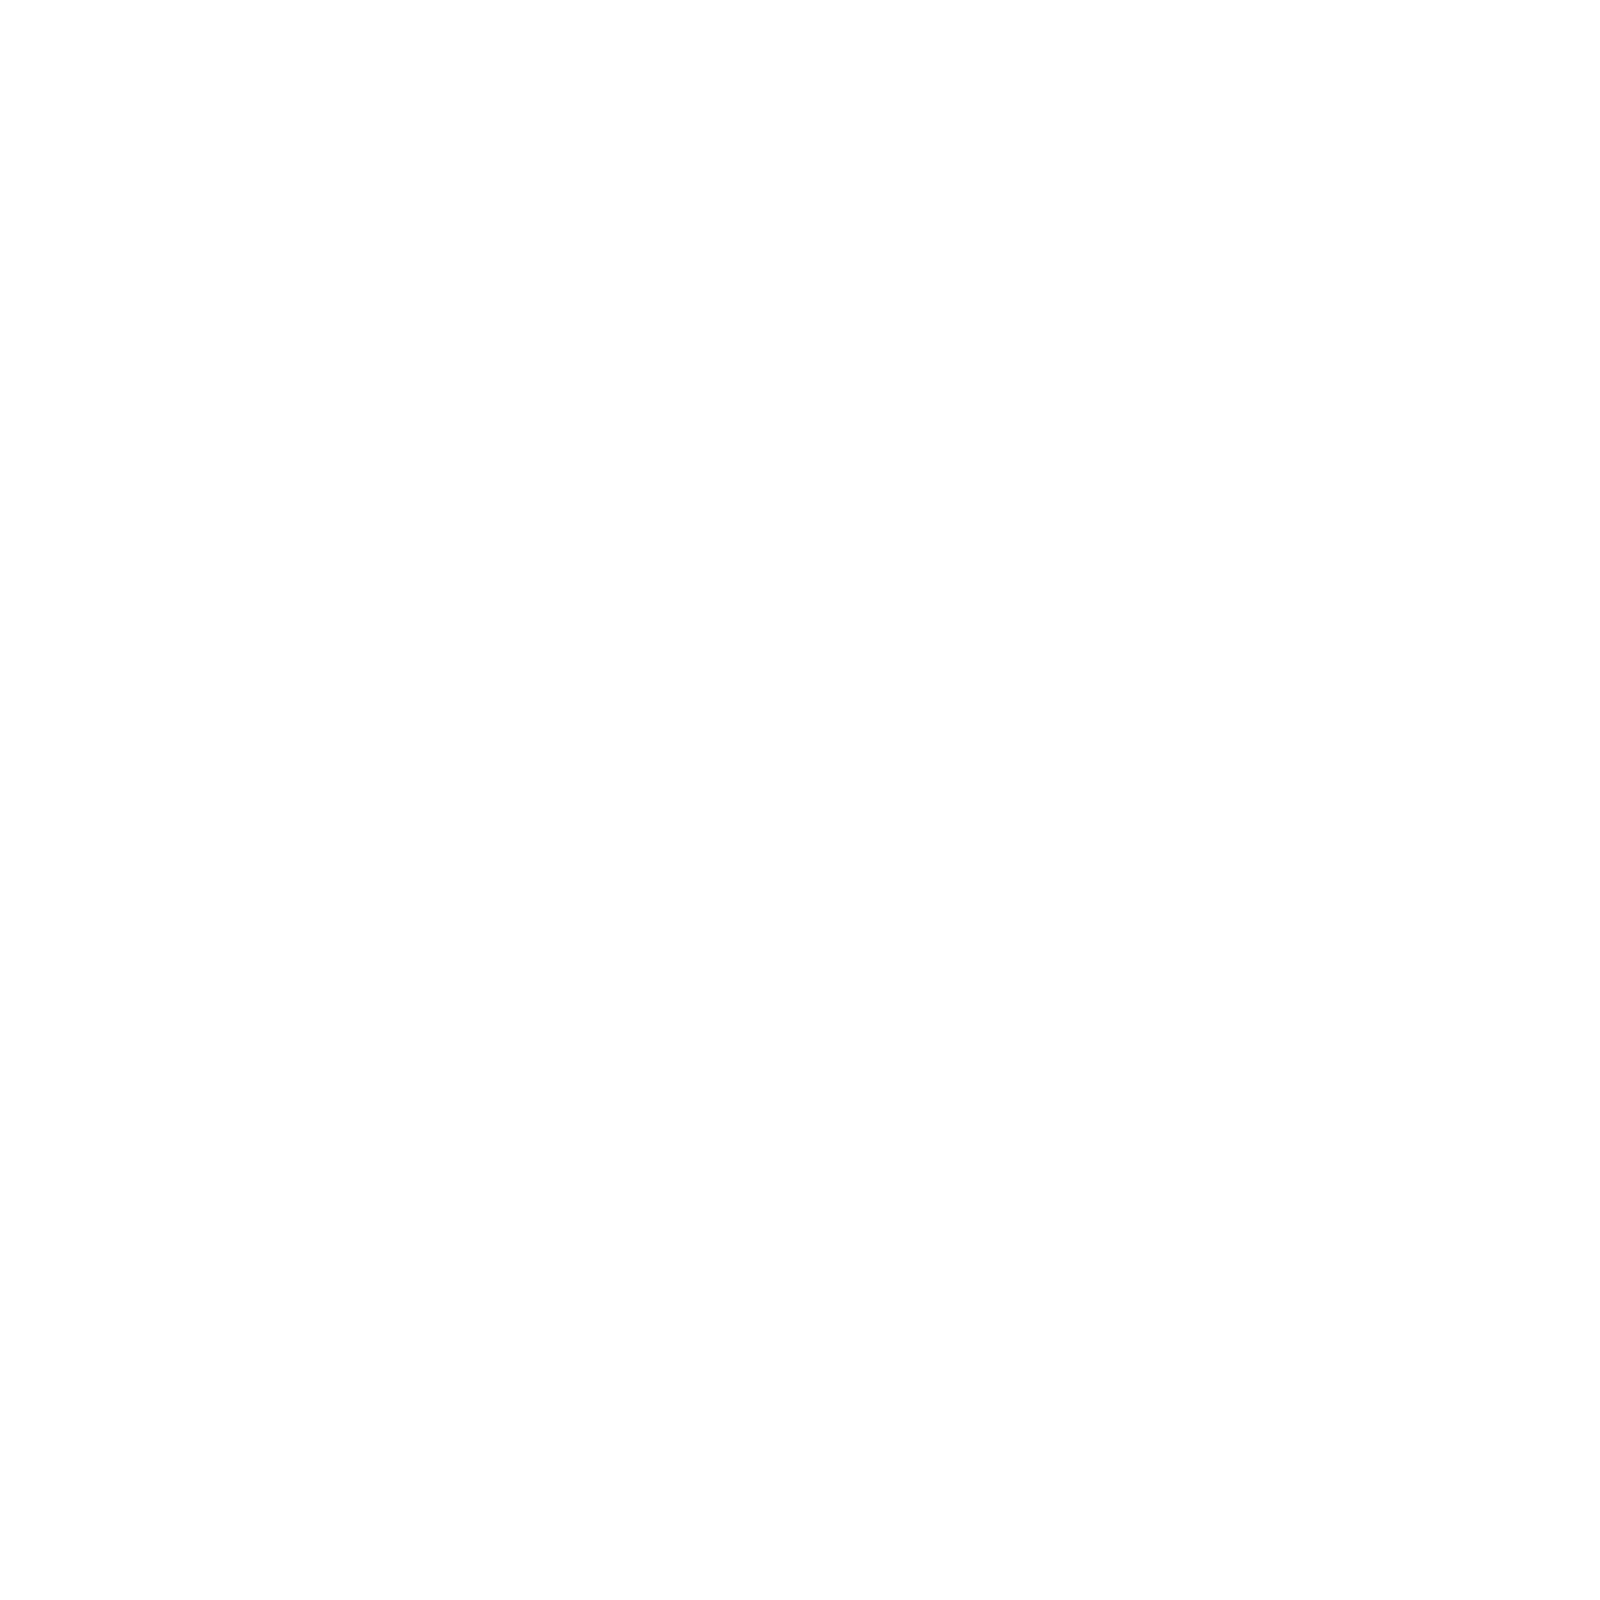

In [6]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
%matplotlib notebook


def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

<IPython.core.display.Javascript object>


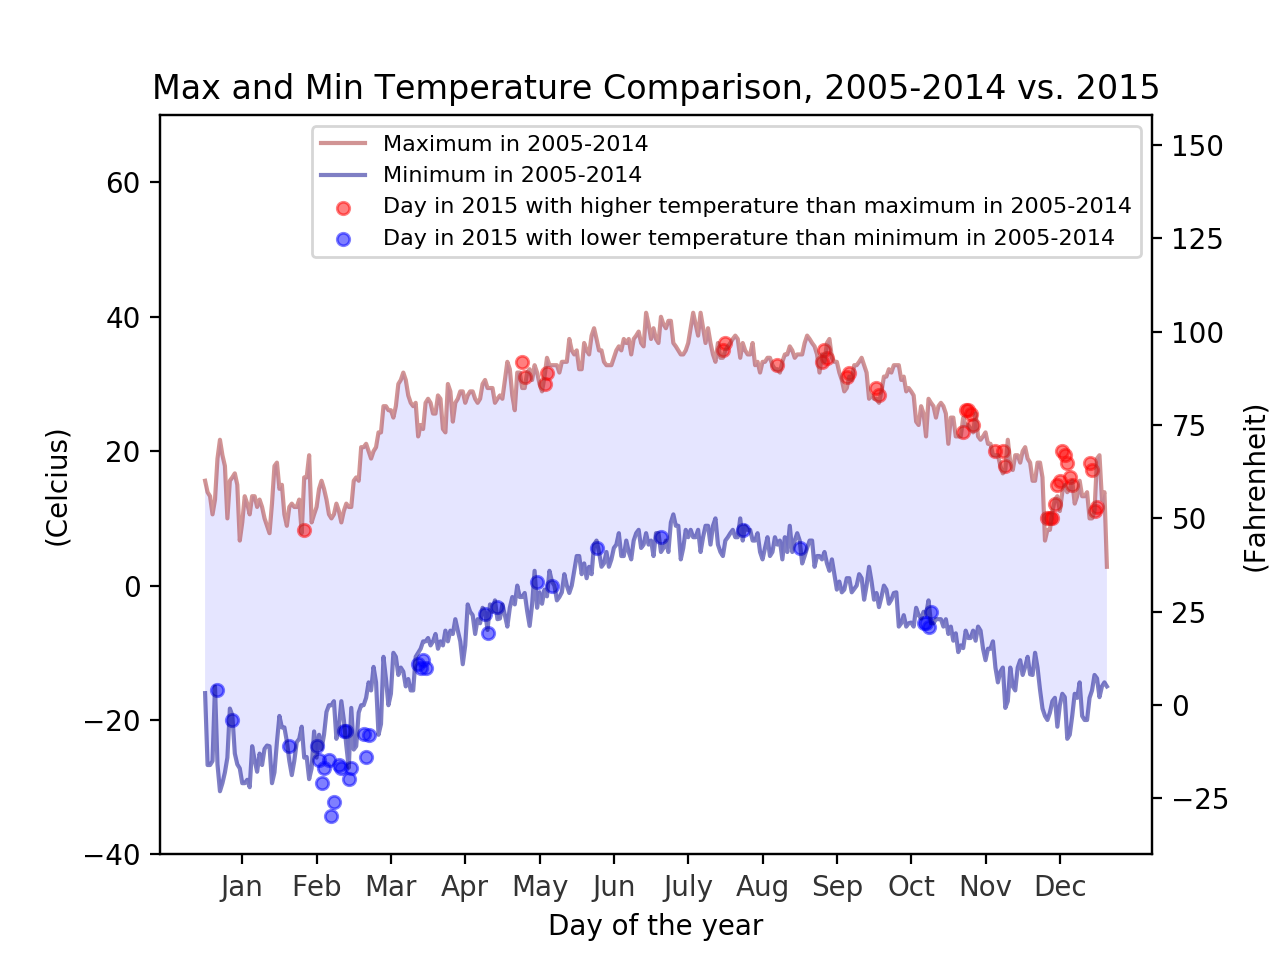

In [5]:

import numpy as np
from datetime import datetime


def get_df():
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    df['Data_Value'] = df['Data_Value'] / 10
    df['Year'] = df['Date'].apply(lambda x: x[0:4])
    df['Dates'] = df['Date'].apply(nth_day)
    df = df.drop(df[df.Dates == nth_day('2016-02-29')].index)
    df = df.drop(df[df.Year == '2015'].index).groupby('Dates').aggregate([np.max, np.min])
    return df

def get_df_15():
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    df['Data_Value'] = df['Data_Value'] / 10
    df['Dates'] = df['Date'].apply(nth_day)
    df['Year'] = df['Date'].apply(lambda x: x[0:4])
    df_15 = df[df.Year == '2015']
    df_15 = df_15.drop(df_15[df_15.Dates == nth_day('2016-02-29')].index).groupby('Dates').aggregate([np.max, np.min])
    return df_15

def nth_day(date):
    datetime_object = datetime.strptime(date, '%Y-%m-%d')
    day_of_year = datetime_object.timetuple().tm_yday
    return day_of_year

def get_max():
    return get_df().Data_Value.amax.values
    
def get_min():
    return get_df().Data_Value.amin.values

def get_max_15():
    df_15 = get_df_15()
    value_15 = df_15.Data_Value.amax
    value = get_max()
    plot_x = []
    plot_y = []
    for day, temp in value_15.items():
        if temp > value[day - 1]:
            plot_x.append(day)
            plot_y.append(temp)
    return plot_x, plot_y
    
    
def get_min_15():
    df_15 = get_df_15()
    value_15 = df_15.Data_Value.amin
    value = get_min()
    plot_x = []
    plot_y = []
    for day, temp in value_15.items():
        if temp < value[day - 1]:
            plot_x.append(day)
            plot_y.append(temp)
    return plot_x, plot_y
    
def plot():
    df_15 = get_df_15()
    value_15 = df_15.Data_Value.amax
    
    plot_max_x, plot_max_y = get_max_15()
    plot_min_x, plot_min_y = get_min_15()
    
    g_max = get_max()
    g_min = get_min()
    
    value = get_max()
    
    plt.figure()
    plt.plot(g_max, c='brown', alpha=0.5, label='Maximum in 2005-2014')
    plt.plot(g_min, c='darkblue', alpha=0.5, label='Minimum in 2005-2014')
    plt.gca().fill_between(range(len(g_max)),
                                g_max, g_min,
                                facecolor='blue',
                                alpha=0.1)
    plt.scatter(plot_max_x, plot_max_y, s = 20, c='red',alpha=0.5, label='Day in 2015 with higher temperature than maximum in 2005-2014')
    plt.scatter(plot_min_x, plot_min_y, s = 20, c='blue', alpha=0.5, label='Day in 2015 with lower temperature than minimum in 2005-2014')
    months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

    pos = np.arange(15, 350, 30)
    #soften all labels by turning grey
    plt.xticks(pos, months, alpha=0.8)


    #remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')
    plt.legend(loc='upper right',prop={'size': 8})

    ax_1 = plt.gca()
    ax_1.set_xlabel('Day of the year')
    ax_1.set_ylabel('(Celcius)')
    ax_1.set_title('Max and Min Temperature Comparison, 2005-2014 vs. 2015')


    ax2 = ax_1.twinx()              # the Frarenheit scale

    def Tf(Tc):
        return (9./5.)*(Tc)+32


    def update_ax2(ax1):
       y1, y2 = ax1.get_ylim()
       ax2.set_ylim(Tf(y1),Tf(y2))
       ax2.figure.canvas.draw()

    # automatically update ylim of ax2 when ylim of ax1 changes.
    ax_1.callbacks.connect("ylim_changed", update_ax2)
    ax_1.set_ylim(-40, 70)

    ax2.set_ylabel('(Fahrenheit)')




plot()